In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette('husl')

In [3]:
df = pd.read_csv('data/processed.csv', index_col=0, dtype={'key': str, 'title': str, 'authors': str, 'abstract': str, 'year_published': int, 'tags': object})
df.tags = df.tags.str.strip("[]").str.replace(r"\s*|'", '').str.split(',')
df.head()

/var/folders/1y/6byzw1px62g2f5w7p_rhb6kh0000gn/T/ipykernel_57614/1523540997.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df.tags = df.tags.str.strip("[]").str.replace(r"\s*|'", '').str.split(',')


,key,title,authors,abstract,year_published,tags,category,skills,types,lang_family
0,rayyan-354359269,An experience of automated assessment in a lar...,"Zampirolli F.A., Borovina Josko J.M., Venero M...",The 2020 pandemic imposed new demands on teach...,2021,"[data:none, data_available:False, language:pyt...",['dynamic'],['correctness'],"['description', 'evaluation']",['OOP']
1,rayyan-354359270,Semiautomatic generation and assessment of Jav...,"Insa D., Pérez S., Silva J., Tamarit S.",Continuous assessment is essential in educatio...,2021,"[technique:model_solution_req, type:descriptio...","['dynamic', 'static']","['correctness', 'maintainability']","['description', 'evaluation']",['OOP']
2,rayyan-354359271,A tool for evaluating computer programs from s...,"Vaneck Q., Colart T., Frénay B., Vanderose B.",Computer science studies are more and more pop...,2021,"[technique:program_repair, data:none, data_ava...",['static'],"['readability', 'maintainability']",['description'],['OOP']
3,rayyan-354359272,Virtual Teaching Assistant for Grading Program...,"Chou C.-Y., Chen Y.-J.",This study proposes an automated programming a...,2021,"[data_available:False, technique:unit_testing,...","['dynamic', 'static']",['correctness'],"['description', 'evaluation']",['Unknown']
4,rayyan-354359273,Analysis of an automatic grading system within...,"Hegarty-Kelly E., Mooney D.A.",Reliable and pedagogically sound automated fee...,2021,"[data_available:False, tool:vpl, evaluation:st...","['dynamic', 'static']","['correctness', 'readability']","['description', 'evaluation']",['OOP']


# Meta-Data
### Years Published

In [4]:
count_years = df.year_published.value_counts().reset_index().rename(columns={'index': 'year_published', 'year_published': 'no_published'})
count_years.head()

,year_published,no_published
0,2021,28
1,2020,28
2,2019,25
3,2018,21
4,2017,19


In [5]:
count_years.no_published.sum()

123

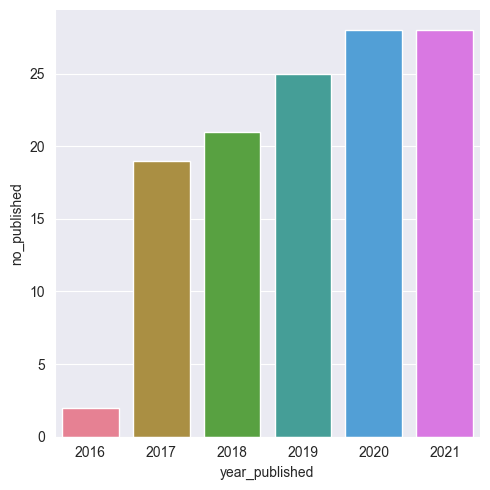

In [6]:
sns.catplot(count_years, kind='bar', x='year_published', y='no_published')
plt.savefig('plots/years_published.pdf')

## Paper Types

In [7]:
# Scaling up Functional Programming Education: Under the Hood of the OCaml MOOC

paper_types = pd.Series([paper_type for paper_type in df.types]).value_counts().reset_index()
paper_types.columns = ["paper_type", 'no_type']
paper_types

,paper_type,no_type
0,"['description', 'evaluation']",82
1,['evaluation'],18
2,['description'],12
3,['experience'],11


In [8]:
paper_types.no_type.sum()

123

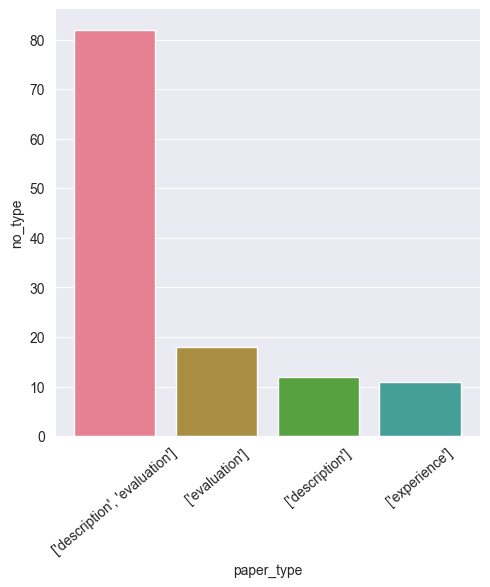

In [9]:
sns.catplot(paper_types, kind='bar', x='paper_type', y='no_type')
plt.xticks(rotation=40)
plt.autoscale()
plt.savefig('plots/paper_types.pdf', bbox_inches='tight')

## Degree of Automation

In [10]:
auto = pd.Series([tag.replace('approach:', '') for tags in df.tags for tag in tags if tag.startswith('approach')]).value_counts().reset_index()
auto.columns = ["degree_of_automation", 'number']
auto.head()

,degree_of_automation,number
0,fully_automated,100
1,semi_automatic,17
2,unclear,6


In [11]:
auto.number.sum()

123

In [12]:
pd.concat([df.title, df.tags.apply(lambda labels: [label for label in labels if 'approach' in label])], axis=1)

,title,tags
0,An experience of automated assessment in a lar...,[approach:fully_automated]
1,Semiautomatic generation and assessment of Jav...,[approach:semi_automatic]
2,A tool for evaluating computer programs from s...,[approach:fully_automated]
3,Virtual Teaching Assistant for Grading Program...,[approach:semi_automatic]
4,Analysis of an automatic grading system within...,[approach:fully_automated]
...,...,...
118,Learning and teaching numerical methods with a...,[approach:fully_automated]
119,Ask-Elle: an Adaptable Programming Tutor for H...,[approach:fully_automated]
120,An AI system for coaching novice programmers,[approach:fully_automated]
121,Automatic extraction of AST patterns for debug...,[approach:fully_automated]


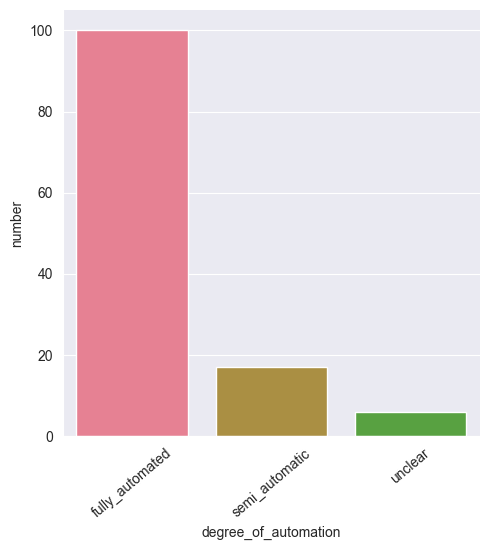

In [13]:
sns.catplot(auto, kind='bar', x='degree_of_automation', y='number')
plt.xticks(rotation=40)
plt.savefig('plots/auto_degree.pdf', bbox_inches='tight')

## Interaction type

In [14]:
inter = pd.Series([tag.replace('interaction:', '') for tags in df.tags for tag in tags if tag.startswith('interaction')]).value_counts().reset_index()
inter.columns = ["interaction", 'number']
inter.head()

,interaction,number
0,unknown,52
1,multiple,50
2,single,18
3,none,3


In [15]:
inter.number.sum()

123

In [16]:
pd.concat([df.title, df.tags.apply(lambda labels: [label for label in labels if 'interaction' in label])], axis=1)

,title,tags
0,An experience of automated assessment in a lar...,[interaction:unknown]
1,Semiautomatic generation and assessment of Jav...,[interaction:unknown]
2,A tool for evaluating computer programs from s...,[interaction:unknown]
3,Virtual Teaching Assistant for Grading Program...,[interaction:multiple]
4,Analysis of an automatic grading system within...,[interaction:unknown]
...,...,...
118,Learning and teaching numerical methods with a...,[interaction:multiple]
119,Ask-Elle: an Adaptable Programming Tutor for H...,[interaction:multiple]
120,An AI system for coaching novice programmers,[interaction:unknown]
121,Automatic extraction of AST patterns for debug...,[interaction:multiple]


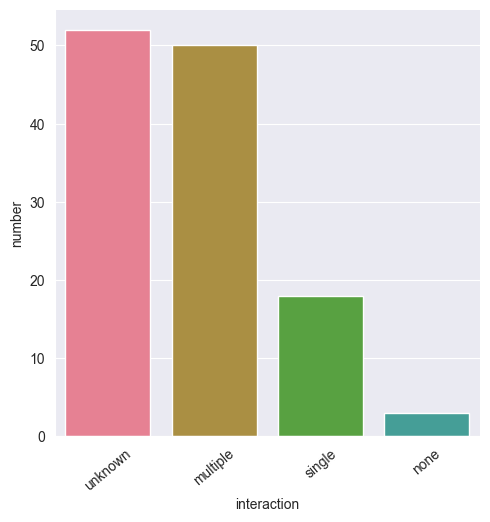

In [17]:
sns.catplot(inter, kind='bar', x='interaction', y='number')
plt.xticks(rotation=40)
plt.savefig('plots/interaction.pdf', bbox_inches='tight')

# Category

In [18]:
category = pd.Series([cat for cat in df.category]).value_counts().reset_index()
category.columns = ["category", 'number']
category

,category,number
0,['dynamic'],52
1,"['dynamic', 'static']",30
2,['static'],30
3,"['static', 'machine learning']",5
4,['machine learning'],2
5,"['dynamic', 'machine learning']",1
6,['misc'],1
7,"['dynamic', 'static', 'machine learning']",1


In [19]:
category.number.sum()

122

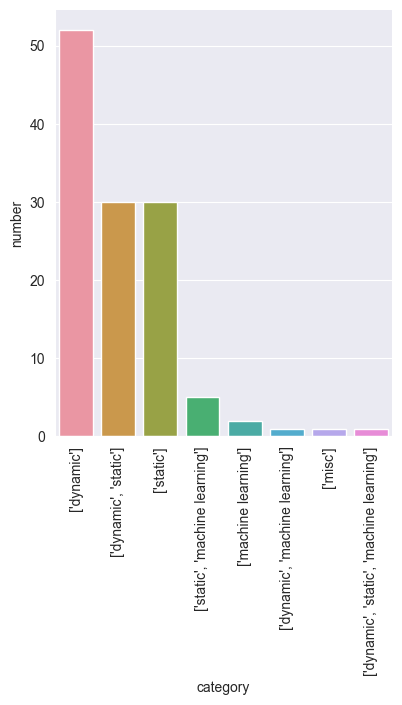

In [20]:
sns.catplot(category, kind='bar', x='category', y='number')
plt.xticks(rotation=90)
plt.savefig('plots/category.pdf', bbox_inches='tight')

In [21]:
cat_time = df[['year_published', 'category']].copy()

cat_time.category = cat_time.category.fillna('') # Remove once final paper is categorised

cat_time['dynamic'] = cat_time.category.map(lambda cat: True if 'dynamic' in cat else False)
cat_time['static'] = cat_time.category.map(lambda cat: True if 'static' in cat else False)
cat_time['machine_learning'] = cat_time.category.map(lambda cat: True if 'machine learning' in cat else False)
cat_time = cat_time.drop(columns=['category'])

cat_time

,year_published,dynamic,static,machine_learning
0,2021,True,False,False
1,2021,True,True,False
2,2021,False,True,False
3,2021,True,True,False
4,2021,True,True,False
...,...,...,...,...
118,2017,True,True,False
119,2016,True,False,False
120,2017,False,True,True
121,2017,False,True,False


In [22]:
cat_time_sum = cat_time.groupby('year_published').sum().cumsum()
cat_time_sum

,dynamic,static,machine_learning
year_published,,,
2016,2,0,0
2017,11,16,1
2018,25,24,2
2019,40,38,6
2020,65,50,7
2021,84,66,9


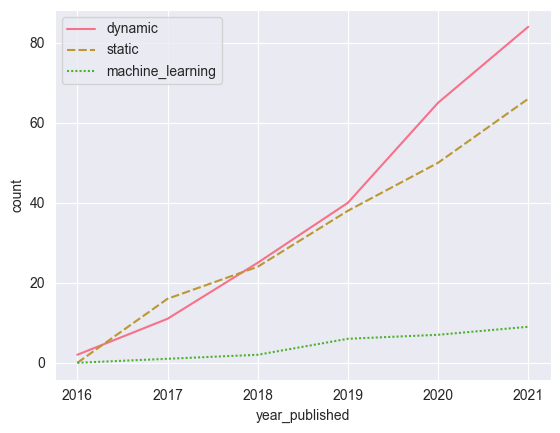

In [23]:
ax = sns.lineplot(cat_time_sum).set(ylabel='count')
plt.savefig('plots/category_time.pdf', bbox_inches='tight')

## Skills

In [24]:
skills = pd.Series([skill for skill in df.skills]).value_counts().reset_index()
skills.columns = ["skills", 'number']
skills

,skills,number
0,['correctness'],75
1,"['correctness', 'readability']",21
2,"['correctness', 'maintainability']",8
3,['readability'],7
4,"['correctness', 'readability', 'maintainability']",7
5,"['readability', 'maintainability']",3
6,"['correctness', 'documentation']",1
7,['maintainability'],1


In [25]:
skills.number.sum()

123

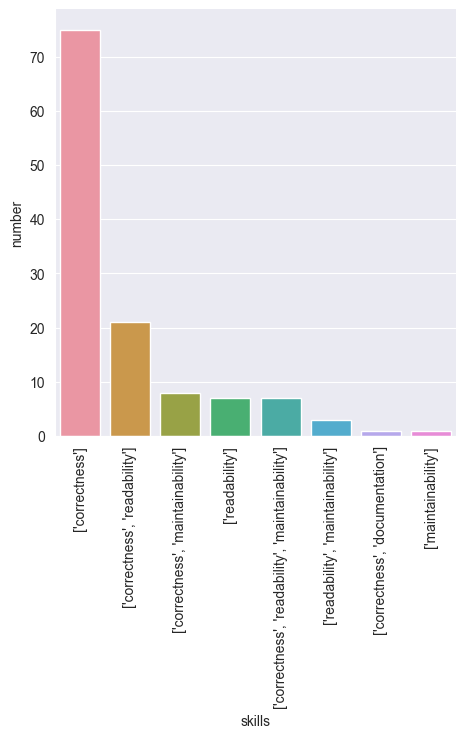

In [26]:
sns.catplot(skills, kind='bar', x='skills', y='number')
plt.xticks(rotation=90)
plt.savefig('plots/skills.pdf', bbox_inches='tight')

# Language

In [27]:
families = pd.Series([family for family in df.lang_family]).value_counts().reset_index()
families.columns = ["language_family", 'number']
families

,language_family,number
0,['OOP'],85
1,['Unknown'],9
2,['Functional'],8
3,['Agnostic'],5
4,['Low-Level'],3
5,['Graphics'],2
6,"['OOP', 'Graphics']",2
7,"['OOP', 'Functional']",2
8,"['OOP', 'Agnostic']",2
9,['Web'],2


In [28]:
families.number.sum()

123

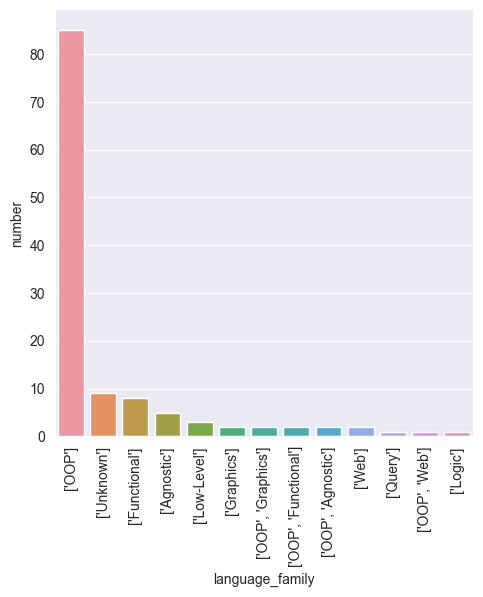

In [29]:
sns.catplot(families, kind='bar', x='language_family', y='number')
plt.xticks(rotation=90)
plt.savefig('plots/lang_family.pdf', bbox_inches='tight')

# Grading/Feedback Techniques

In [38]:
tech = pd.Series([tag.replace('technique:', '') for tags in df.tags for tag in tags if tag.startswith('technique')]).value_counts().reset_index()
tech.columns = ["technique", 'number']
tech

,technique,number
0,unit_testing,83
1,pattern_matching,23
2,static_analysis,21
3,model_solution_req,21
4,dsl_rules,18
5,program_repair,13
6,model_solution_closeness,11
7,machine_learning,9
8,style_check,9
9,code_repair_for_feedback,8


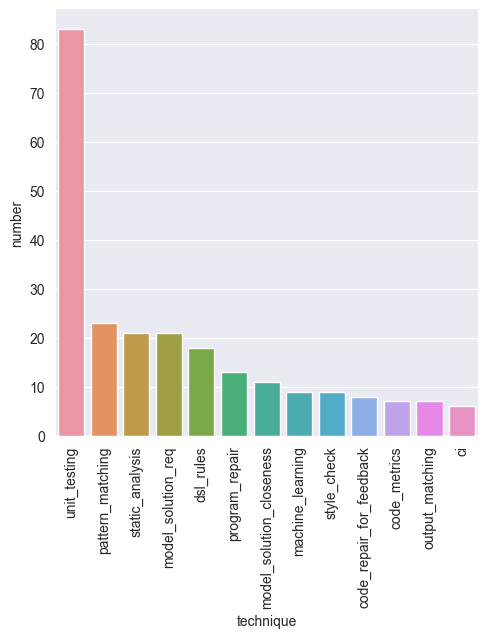

In [43]:
## TRUNCATED UNDER 6 RESULTS
sns.catplot(tech[tech['number'] > 5], kind='bar', x='technique', y='number')
plt.xticks(rotation=90)
plt.savefig('plots/technique.pdf', bbox_inches='tight')

# Evaluation

In [31]:
# NEEDS DEDUPLICATION

evaluation  = pd.Series([tag.replace('evaluation:', '') for tags in df.tags for tag in tags if tag.startswith('evaluation')]).value_counts().reset_index()
evaluation.columns = ["evaluation", 'number']
evaluation

,evaluation,number
0,student_survey,39
1,compared_to_human,23
2,analytics,20
3,none,12
4,with_without,11
5,auto_grading,9
6,manual_grading,9
7,auto_graders,7
8,user_study,6
9,grading_accuracy,6


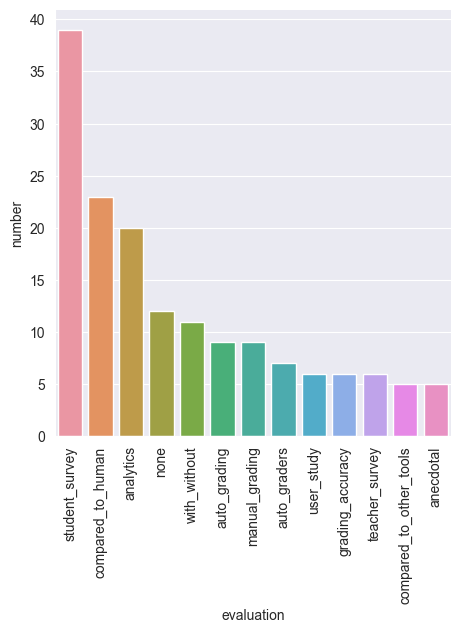

In [40]:
## TRUNCATED UNDER 5 RESULTS
sns.catplot(evaluation[evaluation['number'] > 4], kind='bar', x='evaluation', y='number')
plt.xticks(rotation=90)
plt.savefig('plots/evaluation.pdf', bbox_inches='tight')

## Data Availiablity